In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# imports
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix
from keras.models import Model
import keras.layers as L
import lightgbm as lgb
from keras.layers import LeakyReLU
from scipy import fftpack
import librosa
import tensorflow as tf
from sklearn import metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./drive/My Drive/Colab Notebooks/liverpool-ion-switching/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

B_NUM = 10
B_SIZE = 500000

# Any results you write to the current directory are saved as output.

./drive/My Drive/Colab Notebooks/liverpool-ion-switching/a-signal-processing-approach-low-pass-filtering.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/3-simple-ideas-lb-0-938.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/use_sound_feature.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/simple_Boosting.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/wavenet-with-1-more-feature.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/on-markov-chains-and-the-competition-data.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/single-model-lgbm-kalman-filter.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/shifted-rfc-pipeline.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/ion-weighted-voting-ensemble.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/music_feature.ipynb
./drive/My Drive/Colab Notebooks/liverpool-ion-switching/score_vote.ipynb
./drive/My Drive/Colab N

In [0]:
# load submission files
submit = pd.read_csv("./drive/My Drive/Colab Notebooks/liverpool-ion-switching/data/train.csv")
y = submit['open_channels']
# high scoring public kernels
paths = {
    "lgbm": "./drive/My Drive/Colab Notebooks/liverpool-ion-switching/data/oof_lgbm_50hz.csv",
    "wavenet": "./drive/My Drive/Colab Notebooks/liverpool-ion-switching/data/oof_wavenet_iiyatu.csv",
}
weights = np.array([1,1]) # LB score as a weight
subs = submit.copy()
for i, p in enumerate(paths.keys()):
    tmp = pd.read_csv(paths[p])
    subs[f"{p}"] = tmp["open_channels"]

subs.drop(columns=["time", "open_channels", "signal"], inplace=True)

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

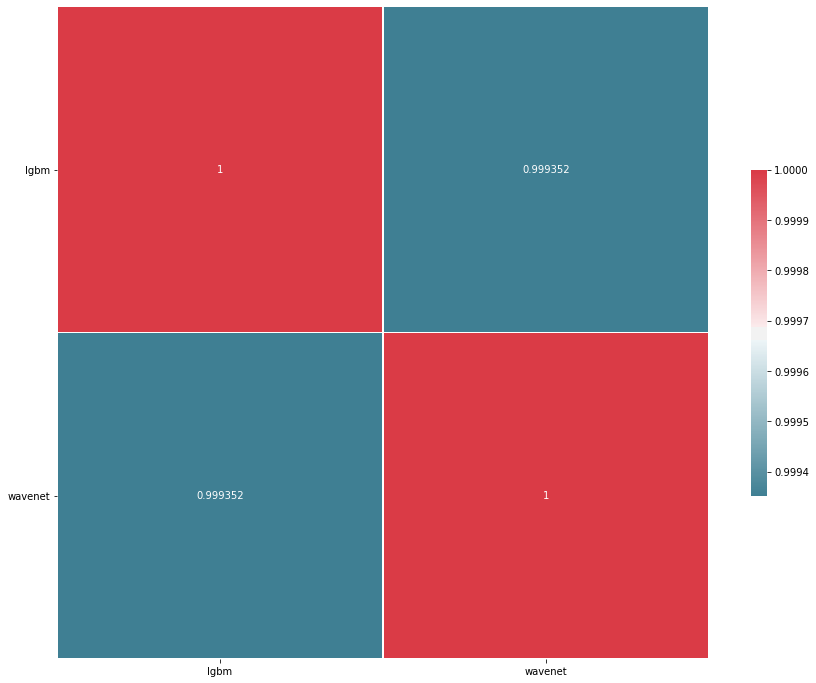

In [16]:
# Compute the correlation matrix
corr = subs.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt="g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_ylim(corr.shape[0], 0)
plt.yticks(rotation=0)

In [17]:
f1 = metrics.f1_score(y, subs['lgbm'], average = 'macro')
f2 = metrics.f1_score(y, subs['wavenet'], average = 'macro')
print(f1)
print(f2)

0.9404759460880142
0.9417301168675022


In [0]:
# pandas weighted voting implementation
def weighted_voting(row):
    h = np.histogram(row.values, weights=weights)
    return np.round(h[1][np.argmax(h[0])])

In [24]:
for i in range(10):
  weights = np.array([i/10.0, (10-i)/10.0]) 
  # sub_vote = subs.apply(weighted_voting, axis=1)
  # f1 = metrics.f1_score(y, sub_vote, average = 'macro')
  # print(f1)
  print(weights)

[0. 1.]
[0.1 0.9]
[0.2 0.8]
[0.3 0.7]
[0.4 0.6]
[0.5 0.5]
[0.6 0.4]
[0.7 0.3]
[0.8 0.2]
[0.9 0.1]


In [22]:
f1 = metrics.f1_score(y, sub_vote, average = 'macro')
f1

0.9409712488204426

In [0]:
# load submission files
submit = pd.read_csv("./drive/My Drive/Colab Notebooks/liverpool-ion-switching/submission/sample_submission.csv")
y = 
# high scoring public kernels
paths = {
    "lgbm": "./drive/My Drive/Colab Notebooks/liverpool-ion-switching/data/sub_lgbm_50hz.csv",
    "wavenet": "./drive/My Drive/Colab Notebooks/liverpool-ion-switching/data/submission_wavenet_iiyatu.csv",
}
# weights = np.array([0.941, 0.94, 0.94, 0.94, 0.94]) # LB score as a weight
subs = submit.copy()
for i, p in enumerate(paths.keys()):
    tmp = pd.read_csv(paths[p])
    subs[f"{p}"] = tmp["open_channels"]

subs.drop(columns=["time", "open_channels"], inplace=True)

In [0]:
f1 = metrics.f1_score(y[i*B_SIZE:(i+1)*B_SIZE], oof_pred[i*B_SIZE:(i+1)*B_SIZE], average = 'macro')
f1

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

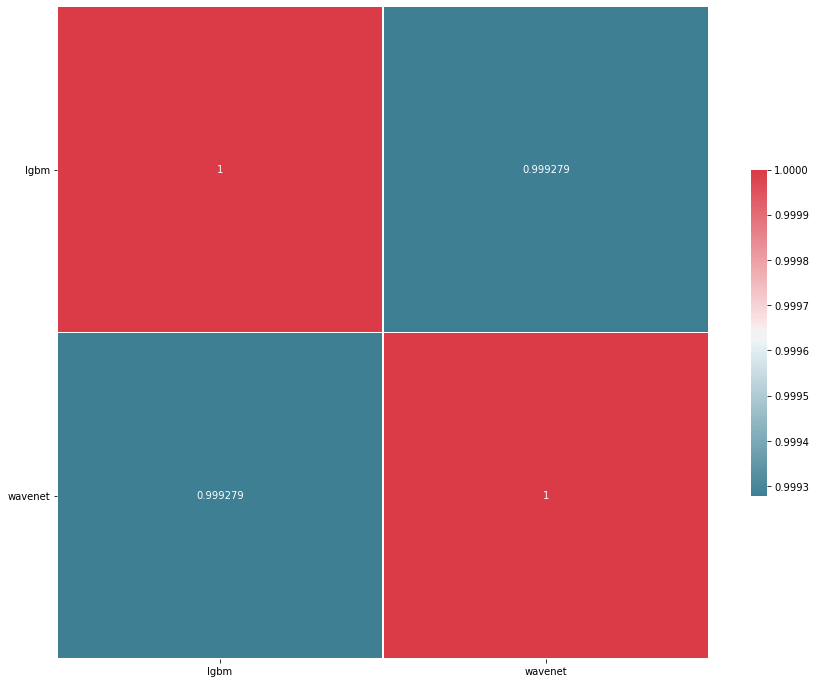

In [3]:
# Compute the correlation matrix
corr = subs.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt="g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_ylim(corr.shape[0], 0)
plt.yticks(rotation=0)

In [0]:
# pandas weighted voting implementation
def weighted_voting(row):
    h = np.histogram(row.values, weights=weights)
    return np.round(h[1][np.argmax(h[0])])